In [112]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
data_IDHM = pd.read_excel(r'datasets/IDHM_dataset.xlsx')
data_ENEM = pd.read_csv('datasets/MICRODADOS_ENEM_2020.csv', sep=";", encoding="ISO-8859-1", nrows=10)

In [61]:
data_IDHM.columns

Index(['Ranking_IDHM_2010', 'Municipio', 'IDHM', 'IDHM_Renda',
       'IDHM_Longevidade', 'IDHM_Educacao'],
      dtype='object')

In [62]:
#verificando valores faltantes
data_IDHM.isna().any()

Ranking_IDHM_2010    False
Municipio            False
IDHM                 False
IDHM_Renda           False
IDHM_Longevidade     False
IDHM_Educacao        False
dtype: bool

In [63]:
data_ENEM.isna().any()

NU_INSCRICAO       False
NU_ANO             False
TP_FAIXA_ETARIA    False
TP_SEXO            False
TP_ESTADO_CIVIL    False
                   ...  
Q021                True
Q022                True
Q023                True
Q024                True
Q025                True
Length: 76, dtype: bool

In [113]:
data_IDHM['IDHM'] = data_IDHM['IDHM'].str.replace(',','.')
data_IDHM['IDHM_Renda'] = data_IDHM['IDHM_Renda'].str.replace(',','.')
data_IDHM['IDHM_Longevidade'] = data_IDHM['IDHM_Longevidade'].str.replace(',','.')
data_IDHM['IDHM_Educacao'] = data_IDHM['IDHM_Educacao'].str.replace(',','.')


In [114]:
#extrair apenas os 5 primeiros caracteres '0.000' para remover erros do tipo '0.000td>'
data_IDHM['IDHM_Renda'] = data_IDHM['IDHM_Renda'].str[:5]
data_IDHM['IDHM_Longevidade'] = data_IDHM['IDHM_Longevidade'].str[:5]
data_IDHM['IDHM_Educacao'] = data_IDHM['IDHM_Educacao'].str[:5]
#data_IDHM['IDHM_Educacao'].unique()

In [115]:
#transformando tipo em float
data_IDHM['IDHM'] = data_IDHM['IDHM'].astype(float)
data_IDHM['IDHM_Renda'] = data_IDHM['IDHM_Renda'].astype(float)
data_IDHM['IDHM_Longevidade'] = data_IDHM['IDHM_Longevidade'].astype(float)
data_IDHM['IDHM_Educacao'] = data_IDHM['IDHM_Educacao'].astype(float)
#data_IDHM.dtypes

In [116]:
data_IDHM['UF'] = data_IDHM['Municipio'].str.extract(r"\((.*?)\)", expand=False) # extrai o que tá entre parenteses r"\((.*?)\)"

In [117]:
data_IDHM

,Ranking_IDHM_2010,Municipio,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,UF
0,1 º,São Caetano do Sul (SP),0.862,0.891,0.887,0.811,SP
1,2 º,Águas de São Pedro (SP),0.854,0.849,0.890,0.825,SP
2,3 º,Florianópolis (SC),0.847,0.870,0.873,0.800,SC
3,4 º,Balneário Camboriú (SC),0.845,0.854,0.894,0.789,SC
4,4 º,Vitória (ES),0.845,0.876,0.855,0.805,ES
...,...,...,...,...,...,...,...
5560,5560 º,Uiramutã (RR),0.453,0.439,0.766,0.276,RR
5561,5562 º,Marajá do Sena (MA),0.452,0.400,0.774,0.299,MA
5562,5563 º,Atalaia do Norte (AM),0.450,0.481,0.733,0.259,AM
5563,5564 º,Fernando Falcão (MA),0.443,0.417,0.728,0.286,MA


In [17]:
renda_by_UF = data_IDHM[['IDHM_Renda', 'UF']].groupby('UF').mean().sort_values('IDHM_Renda', ascending=False).reset_index()

In [18]:
renda_by_UF_frame = pd.DataFrame(renda_by_UF)

In [19]:
renda_by_UF_frame

,UF,IDHM_Renda
0,DF,0.863000
1,SC,0.728038
2,RS,0.722115
3,SP,0.716487
4,RJ,0.704565
5,PR,0.691950
6,MS,0.687846
7,GO,0.684041
8,MT,0.682149
9,ES,0.680628


In [36]:
renda_by_UF_frame = renda_by_UF_frame.sort_values(['IDHM_Renda'], ascending=False).reset_index(drop=True)

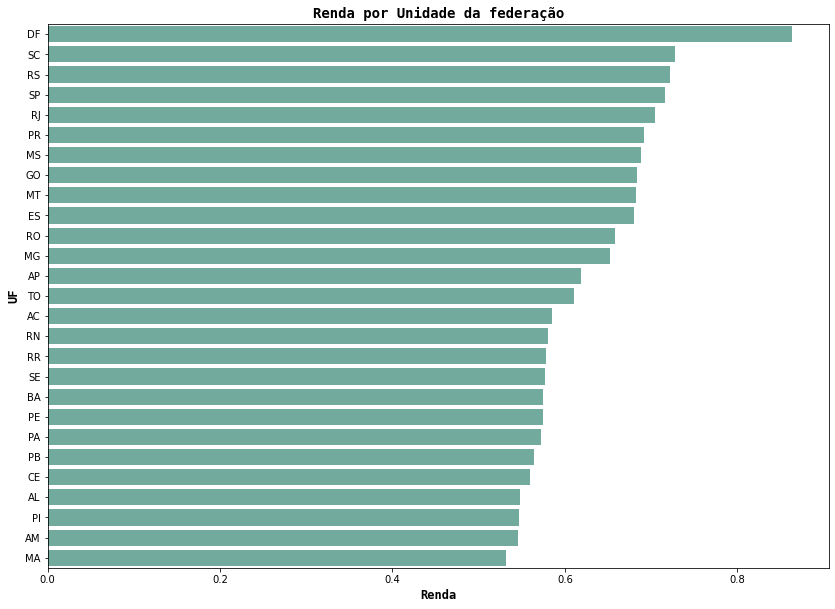

In [39]:
plt.figure(figsize=(14, 10))

ax = sns.barplot(
        x="IDHM_Renda", 
        y="UF", 
        data=renda_by_UF_frame, 
        ci=None, 
        color='#69b3a2')

plt.xlabel('Renda', size=12, family='monospace', weight=800)
plt.ylabel('UF', size=12, family='monospace', weight=800)
plt.title('Renda por Unidade da federação', size=14, family='monospace', weight=1000)

plt.show()

In [118]:
data_IDHM['Cidade'] = data_IDHM['Municipio'].str.replace(r"\(.*\)","")

C:\Users\user\AppData\Local\Temp/ipykernel_7944/2375810931.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_IDHM['Cidade'] = data_IDHM['Municipio'].str.replace(r"\(.*\)","")


In [119]:
data_IDHM

,Ranking_IDHM_2010,Municipio,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,UF,Cidade
0,1 º,São Caetano do Sul (SP),0.862,0.891,0.887,0.811,SP,São Caetano do Sul
1,2 º,Águas de São Pedro (SP),0.854,0.849,0.890,0.825,SP,Águas de São Pedro
2,3 º,Florianópolis (SC),0.847,0.870,0.873,0.800,SC,Florianópolis
3,4 º,Balneário Camboriú (SC),0.845,0.854,0.894,0.789,SC,Balneário Camboriú
4,4 º,Vitória (ES),0.845,0.876,0.855,0.805,ES,Vitória
...,...,...,...,...,...,...,...,...
5560,5560 º,Uiramutã (RR),0.453,0.439,0.766,0.276,RR,Uiramutã
5561,5562 º,Marajá do Sena (MA),0.452,0.400,0.774,0.299,MA,Marajá do Sena
5562,5563 º,Atalaia do Norte (AM),0.450,0.481,0.733,0.259,AM,Atalaia do Norte
5563,5564 º,Fernando Falcão (MA),0.443,0.417,0.728,0.286,MA,Fernando Falcão


In [171]:
df_IDHM_permitido = data_IDHM.loc[(data_IDHM['IDHM'] <= 0.599) & (data_IDHM['UF'] == 'MA'), ['IDHM', 'IDHM_Educacao', 'Cidade', 'UF']].sort_values(by='Cidade', ascending=False)

In [172]:
df_IDHM_permitido['Cidade'] = df_IDHM_permitido['Cidade'].str.rstrip()
df_IDHM_permitido['Cidade'].unique()

array(['Água Doce do Maranhão', 'Zé Doca', 'Vitória do Mearim',
       'Vitorino Freire', 'Vila Nova dos Martírios', 'Vargem Grande',
       'Urbano Santos', 'Tutóia', 'Turilândia', 'Turiaçu', 'Tuntum',
       'Tufilândia', 'Timbiras', 'Tasso Fragoso', 'Sítio Novo',
       'São Vicente Ferrer', 'São Roberto',
       'São Raimundo do Doca Bezerra', 'São Luís Gonzaga do Maranhão',
       'São João do Soter', 'São João do Carú', 'São João Batista',
       'São José dos Basílios', 'São Félix de Balsas',
       'São Francisco do Maranhão', 'São Francisco do Brejão',
       'São Domingos do Maranhão', 'São Domingos do Azeitão',
       'São Bernardo', 'São Benedito do Rio Preto', 'Sucupira do Riachão',
       'Sucupira do Norte', 'Serrano do Maranhão',
       'Senador Alexandre Costa', 'Satubinha', 'Santo Antônio dos Lopes',
       'Santo Amaro do Maranhão', 'Santana do Maranhão',
       'Santa Quitéria do Maranhão', 'Santa Luzia do Paruá',
       'Santa Luzia', 'Santa Helena', 'Santa Filomen

In [173]:
escolas = ['SG_UF', 'NO_MUNICIPIO', 'NO_ENTIDADE', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO']
df_escolas = pd.read_csv('datasets/microdados_ed_basica_2021.csv', sep=";", encoding="latin-1", usecols=escolas)

In [174]:
df_EE_selecionadas = df_escolas.loc[(df_escolas['SG_UF'] == 'MA') & (df_escolas['TP_LOCALIZACAO'] == 1) & (df_escolas['TP_DEPENDENCIA'] == 2), escolas]
df_EE_Rural_selecionadas = df_escolas.loc[(df_escolas['SG_UF'] == 'MA') & (df_escolas['TP_LOCALIZACAO'] == 2) & (df_escolas['TP_DEPENDENCIA'] == 2), escolas]
df_EM_selecionadas = df_escolas.loc[(df_escolas['SG_UF'] == 'MA') & (df_escolas['TP_LOCALIZACAO'] == 1) & (df_escolas['TP_DEPENDENCIA'] == 3), escolas]
df_EM_Rural_selecionadas = df_escolas.loc[(df_escolas['SG_UF'] == 'MA') & (df_escolas['TP_LOCALIZACAO'] == 2) & (df_escolas['TP_DEPENDENCIA'] == 3), escolas]


In [175]:
df_EE_selecionadas['NO_MUNICIPIO'] = df_EE_selecionadas['NO_MUNICIPIO'].str.rstrip()
df_EE_Rural_selecionadas['NO_MUNICIPIO'] = df_EE_Rural_selecionadas['NO_MUNICIPIO'].str.rstrip()
df_EM_selecionadas['NO_MUNICIPIO'] = df_EM_selecionadas['NO_MUNICIPIO'].str.rstrip()
df_EM_Rural_selecionadas['NO_MUNICIPIO'] = df_EM_Rural_selecionadas['NO_MUNICIPIO'].str.rstrip()


In [144]:
df_EE_selecionadas['NO_MUNICIPIO'].unique()

array(['Açailândia', 'Afonso Cunha', 'Água Doce do Maranhão', 'Alcântara',
       'Aldeias Altas', 'Altamira do Maranhão', 'Alto Alegre do Maranhão',
       'Alto Alegre do Pindaré', 'Alto Parnaíba', 'Amapá do Maranhão',
       'Amarante do Maranhão', 'Anajatuba', 'Anapurus', 'Apicum-Açu',
       'Araguanã', 'Araioses', 'Arame', 'Arari', 'Axixá', 'Bacabal',
       'Bacabeira', 'Bacuri', 'Bacurituba', 'Balsas', 'Barão de Grajaú',
       'Barra do Corda', 'Barreirinhas', 'Belágua',
       'Bela Vista do Maranhão', 'Benedito Leite', 'Bequimão',
       'Bernardo do Mearim', 'Boa Vista do Gurupi', 'Bom Jardim',
       'Bom Jesus das Selvas', 'Bom Lugar', 'Brejo', 'Brejo de Areia',
       'Buriti', 'Buriti Bravo', 'Buriticupu', 'Buritirana',
       'Cachoeira Grande', 'Cajapió', 'Cajari', 'Campestre do Maranhão',
       'Cândido Mendes', 'Cantanhede', 'Capinzal do Norte', 'Carolina',
       'Carutapera', 'Caxias', 'Cedral', 'Central do Maranhão',
       'Centro do Guilherme', 'Centro Novo do

In [176]:
df_EE_selecionadas.columns = ['UF', 'Cidade', 'Nome_escola', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO']
df_EE_Rural_selecionadas.columns = ['UF', 'Cidade', 'Nome_escola', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO']
df_EM_selecionadas.columns = ['UF', 'Cidade', 'Nome_escola', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO']
df_EM_Rural_selecionadas.columns = ['UF', 'Cidade', 'Nome_escola', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO']




In [177]:
df_EE_selecionadas_IDHM = df_EE_selecionadas.loc[df_EE_selecionadas['Cidade'].isin(df_IDHM_permitido['Cidade'])]
df_EE_Rural_selecionadas_IDHM = df_EE_Rural_selecionadas.loc[df_EE_Rural_selecionadas['Cidade'].isin(df_IDHM_permitido['Cidade'])]
df_EM_selecionadas_IDHM = df_EM_selecionadas.loc[df_EM_selecionadas['Cidade'].isin(df_IDHM_permitido['Cidade'])]
df_EM_Rural_selecionadas_IDHM = df_EM_Rural_selecionadas.loc[df_EM_Rural_selecionadas['Cidade'].isin(df_IDHM_permitido['Cidade'])]




In [170]:
df_EM_Rural_selecionadas_IDHM['Cidade'].unique()

array(['Afonso Cunha', 'Água Doce do Maranhão', 'Alcântara',
       'Aldeias Altas', 'Altamira do Maranhão', 'Alto Alegre do Maranhão',
       'Alto Alegre do Pindaré', 'Amapá do Maranhão',
       'Amarante do Maranhão', 'Anajatuba', 'Anapurus', 'Apicum-Açu',
       'Araguanã', 'Araioses', 'Arame', 'Bacuri', 'Bacurituba',
       'Barão de Grajaú', 'Barreirinhas', 'Belágua',
       'Bela Vista do Maranhão', 'Benedito Leite', 'Boa Vista do Gurupi',
       'Bom Jardim', 'Bom Jesus das Selvas', 'Bom Lugar', 'Brejo',
       'Brejo de Areia', 'Buriti', 'Buriti Bravo', 'Buriticupu',
       'Buritirana', 'Cachoeira Grande', 'Cajapió', 'Cajari',
       'Cândido Mendes', 'Cantanhede', 'Capinzal do Norte', 'Carutapera',
       'Central do Maranhão', 'Centro do Guilherme',
       'Centro Novo do Maranhão', 'Codó', 'Coelho Neto', 'Colinas',
       'Conceição do Lago-Açu', 'Coroatá', 'Duque Bacelar',
       'Esperantinópolis', 'Feira Nova do Maranhão', 'Fernando Falcão',
       'Formosa da Serra Neg

In [178]:
df_EE_selecionadas_IDHM.to_excel('Escolas_Estaduais.xlsx', index=False)
df_EE_Rural_selecionadas_IDHM.to_excel('Escolas_Estaduais_Rurais.xlsx', index=False)
df_EM_selecionadas_IDHM.to_excel('Escolas_Municipais.xlsx', index=False)
df_EM_Rural_selecionadas_IDHM.to_excel('Escolas_Municipais_Rurais.xlsx', index=False)